In [10]:
import gc
gc.collect()

0

In [9]:
# import data
import numpy as np
import pandas as pd

filename = "train_data_wizLabel.csv"
df = pd.read_csv(filename)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 7.9+ GB
None


In [16]:
#split x, y
y = df['target']

cols = list(df.columns)
cols.remove('target')
cols.remove('customer_ID')

n = len(df)
for feature in cols:
    k = df[feature].isnull().sum() / n
    if(n >= 0.4):
        cols.remove(feature)

cols.remove('D_64')

X = df[cols]
X.fillna(0, inplace = True)

C:\Users\A\AppData\Local\Temp\ipykernel_10052\4251327460.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace = True)


Text(0.5, 1.0, 'Feature importance for classification dataset')

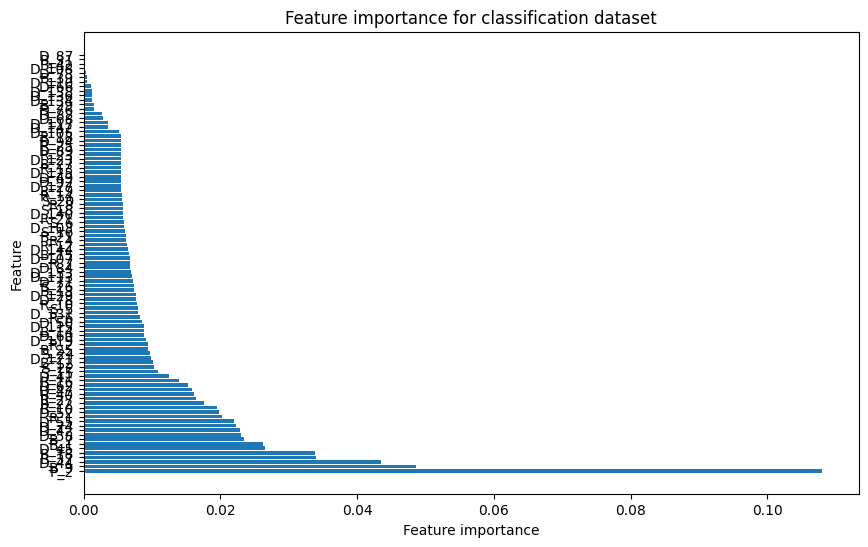

In [17]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
# Feature Importance

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_jobs = -1)

# Train the model on your dataset
rfc.fit(X, y)

# Extract feature importances from the model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance for classification dataset")

In [27]:
lst = X.columns[indices]
imp = list(importances[indices])

selected_features = []
for i in range(len(lst)):
    if(imp[i] >= 0.01):
        selected_features.append(lst[i])
    else:
        break

print(selected_features)

['P_2', 'B_9', 'D_44', 'B_37', 'B_18', 'D_45', 'B_1', 'B_7', 'D_58', 'D_42', 'D_74', 'D_55', 'R_1', 'D_52', 'B_10', 'B_22', 'R_27', 'B_40', 'D_47', 'D_62', 'B_16', 'D_41', 'S_15', 'S_22', 'B_12']


In [31]:
X = X[selected_features]

In [32]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
clf.fit(X, y)
clf.score(X, y)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


0.8699717307447901